In [23]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
import re

In [24]:
#Gathering Data Portion
#create full dataframe with all stats
def createWRDF(dfwrA, dfwrB, dfwrnext):
    dfwr = combine(dfwrA, dfwrB)
    dfwr = addNextYrFpts(dfwr, dfwrnext)
    return dfwr

#add fpts/g for next season
def addNextYrFpts(dfwrcurr, dfwrnext):
    dfwrcurr = pd.merge(dfwrcurr, dfwrnext[['Player', 'Fpts/G']], left_on='Player', right_on='Player', how='inner', suffixes=('', '_nextYr'))
    return dfwrcurr

#add advanced stats from fantasy pros
def cleanFP(dfwr):
    dfwr['Player'] = dfwr['Player'].str.split("(").str[0].str.strip()
    dfwr = dfwr.drop(columns=['AIR', 'AIR/R', 'G', 'REC', 'YDS'])
    return dfwr
#add basic stats from pro football reference
def cleanPFR(dfwr):
    dfwr['Player'] = dfwr['Player'].str.replace(re.escape('*'), '', regex=True)
    dfwr['Player'] = dfwr['Player'].str.replace(re.escape('+'), '', regex=True).str.strip()
    dfwr['Fpts/G'] = dfwr.apply(lambda row: (row.Rec + row.Yds / 10 + row.TD * 6 + row.Fmb * - 2) / row.G, axis=1)
    dfwr = dfwr.drop(columns=['Tm', 'Pos', 'Y/R', 'Tgt', 'Lng', 'Rk'])
    return dfwr
#combine advanced and basic stats into one dataframe
def combine(dfwrA, dfwrB):
    dfwrA = cleanFP(dfwrA)
    dfwrB = cleanPFR(dfwrB)
    dfwr = pd.merge(dfwrA, dfwrB, left_on='Player', right_on='Player', how='inner')
    return dfwr

dfwr22A = pd.read_excel(r"C:\Users\luker\Downloads\Python\WR Machine Learning\WR22.xlsx", 'WR22A')
dfwr22B = pd.read_excel(r"C:\Users\luker\Downloads\Python\WR Machine Learning\WR22.xlsx", 'WR22B')
dfwr22 = combine(dfwr22A, dfwr22B)

dfwr21A = pd.read_excel(r"C:\Users\luker\Downloads\Python\WR Machine Learning\WR21.xlsx", 'WR21A')
dfwr21B = pd.read_excel(r"C:\Users\luker\Downloads\Python\WR Machine Learning\WR21.xlsx", 'WR21B')
dfwr21 = createWRDF(dfwr21A, dfwr21B, dfwr22)

,Rank,Player,Y/R,YBC,YBC/R,YAC,YAC/R,YACON,YACON/R,BRKTKL,...,Yds,TD,1D,Succ%,Y/Tgt,R/G,Y/G,Fmb,Fpts/G,Fpts/G_nextYr
0,1,Cooper Kupp,13.4,1101,7.6,846,5.8,257,1.8,10,...,1947,16,89,63.4,10.2,8.5,114.5,0,25.629412,20.911111
1,3,Ja'Marr Chase,18.0,804,9.9,651,8.0,251,3.1,8,...,1455,13,56,52.3,11.4,4.8,85.6,2,17.676471,20.133333
2,4,Justin Jefferson,14.9,1141,10.5,482,4.4,149,1.4,5,...,1616,10,75,55.7,9.7,6.4,95.1,1,19.270588,20.994118
3,5,Davante Adams,12.6,961,7.8,592,4.8,146,1.2,5,...,1553,11,84,59.8,9.2,7.7,97.1,0,21.518750,19.623529
4,6,Mike Evans,14.0,776,10.5,259,3.5,63,0.9,2,...,1035,14,56,59.6,9.1,4.6,64.7,0,16.343750,15.026667
5,7,Tyreek Hill,11.2,795,7.2,444,4.0,114,1.0,10,...,1239,9,75,61.6,7.8,6.5,72.9,2,16.758824,19.411765
6,8,Stefon Diggs,11.9,899,8.7,326,3.2,152,1.5,7,...,1225,10,66,54.9,7.5,6.1,72.1,1,16.676471,19.681250
7,9,Mike Williams,15.1,731,9.6,415,5.5,136,1.8,2,...,1146,9,51,51.9,8.9,4.8,71.6,0,15.287500,13.576923
8,11,Tyler Lockett,16.1,898,12.3,277,3.8,65,0.9,2,...,1175,8,41,53.3,11.0,4.6,73.4,0,14.906250,14.831250
9,12,Diontae Johnson,10.9,634,5.9,527,4.9,98,0.9,8,...,1161,8,59,47.3,6.9,6.7,72.6,2,16.693750,10.129412


<Axes: >

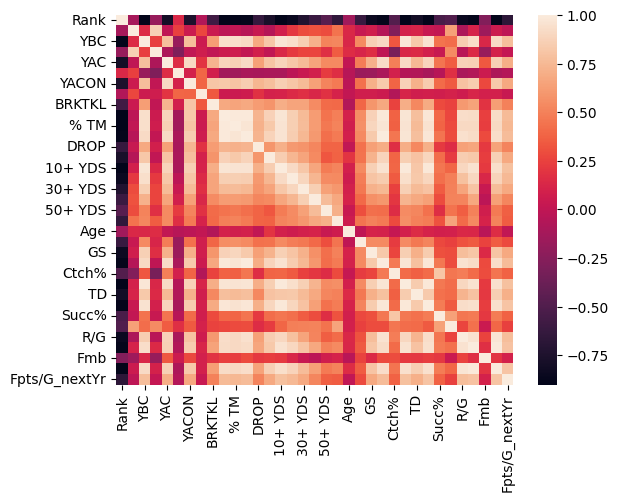

In [37]:
#Data Analysis Portion
corr=dfwr21.corr(numeric_only=True)
sns.heatmap(corr)